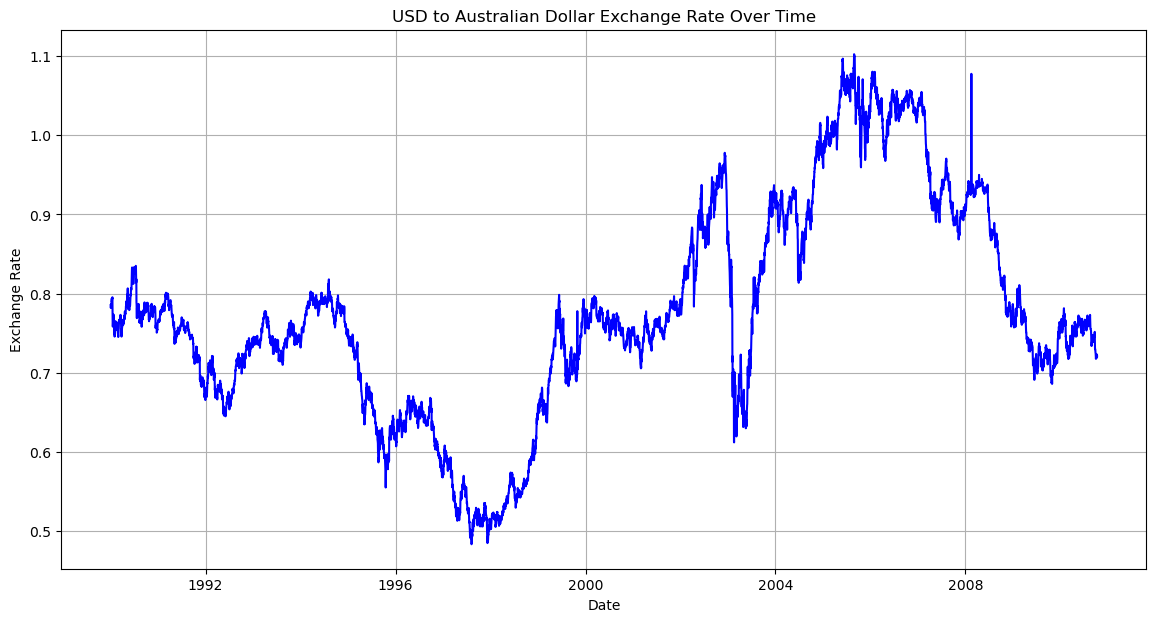

Missing values:
Ex_rate    0
dtype: int64
ADF Statistic: -1.664994180738078
p-value: 0.44923273535982894
Critical Values: {'1%': -3.4312123140180137, '5%': -2.861921078147796, '10%': -2.5669728434336108}


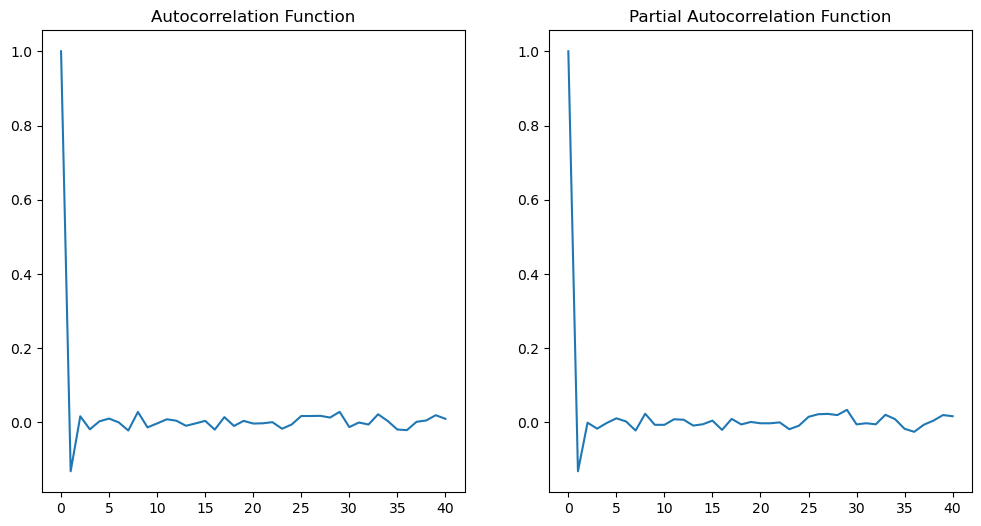

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Fri, 23 Aug 2024   AIC                         -56102.322
Time:                        02:06:14   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

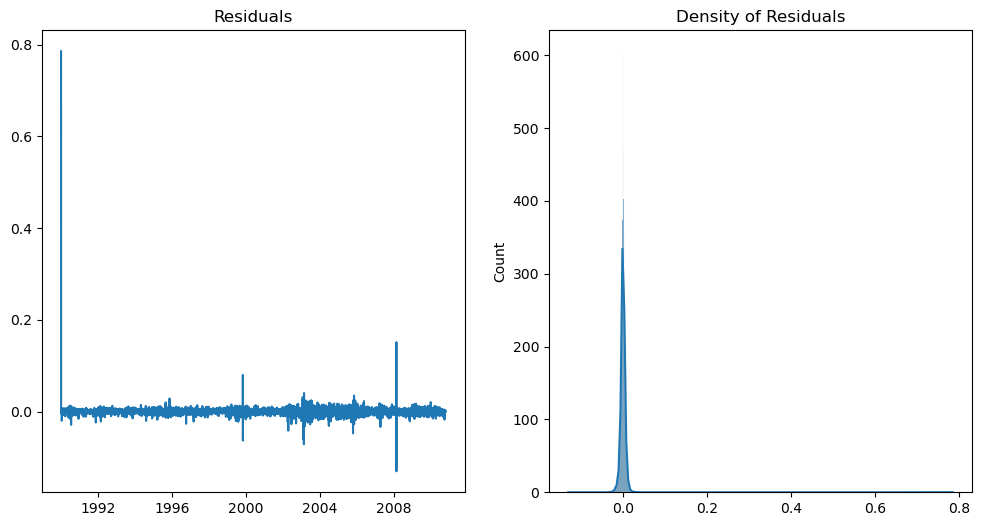

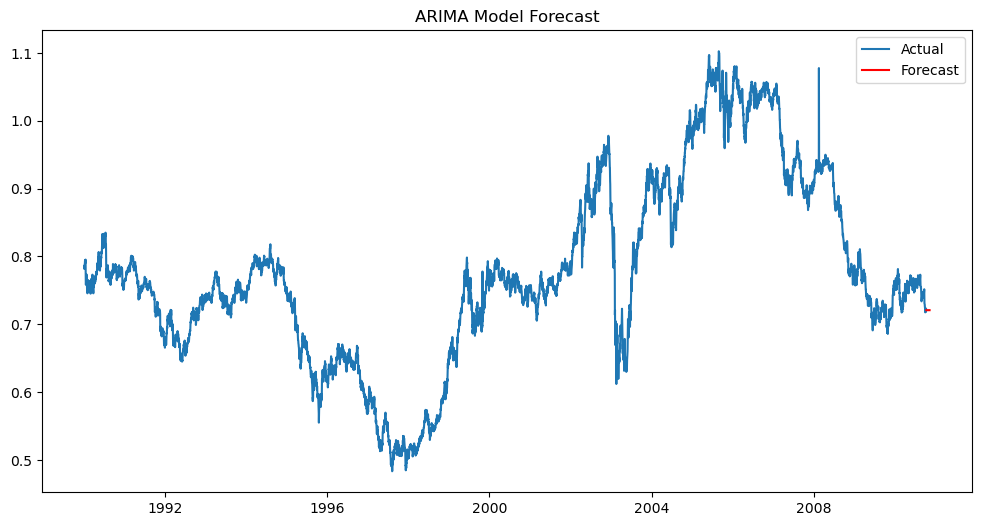

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77628.560
Trend:                             None   BIC                         -77531.479
Seasonal:                      Additive   AICC                        -77628.488
Seasonal Periods:                    12   Date:                 Fri, 23 Aug 2024
Box-Cox:                          False   Time:                         02:06:16
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8698370                alpha                 True
smoothing_seasonal       

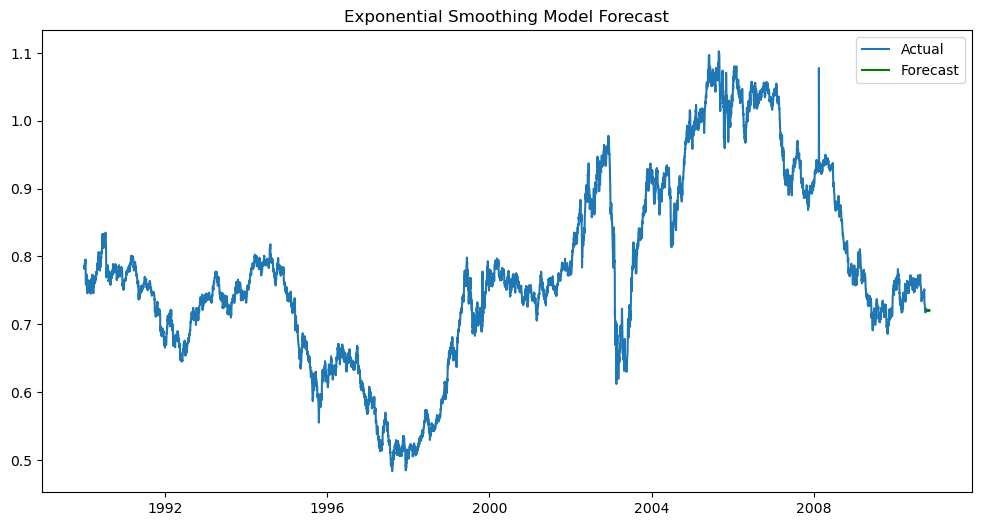

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA - MAE: 0.013494600805886185, RMSE: 0.01663217791311612, MAPE: 1.863220748560114
Exponential Smoothing - MAE: 0.013508538926500498, RMSE: 0.016621494604830662, MAPE: 1.8650351156147624


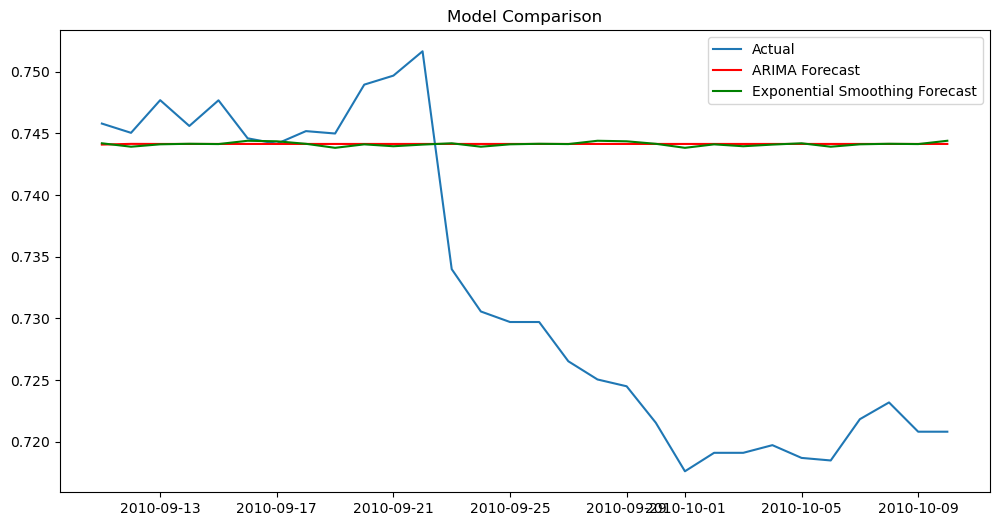

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Part 1: Data Preparation and Exploration

# Load the dataset
file_path = 'D:/Data science ass/20/Timeseries/exchange_rate.csv'
exchange_rates_df = pd.read_csv(file_path)

# Convert the 'date' column to datetime format
exchange_rates_df['date'] = pd.to_datetime(exchange_rates_df['date'], format='%d-%m-%Y %H:%M')

# Set the 'date' column as the index for easier time series handling
exchange_rates_df.set_index('date', inplace=True)

# Plot the time series to explore trends, seasonality, and anomalies
plt.figure(figsize=(14, 7))
plt.plot(exchange_rates_df['Ex_rate'], color='blue')
plt.title('USD to Australian Dollar Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()

# Explanation:
# The plot allows us to visually inspect the data for trends, seasonality, and anomalies. 
# This is crucial for deciding which forecasting models to use and if any preprocessing is necessary.

# Check for missing values
missing_values = exchange_rates_df.isnull().sum()
print(f'Missing values:\n{missing_values}')

# Handle missing values by forward filling (if any)
exchange_rates_df.fillna(method='ffill', inplace=True)

# Explanation:
# Missing data can distort model predictions, so we ensure that there are no gaps. 
# Forward filling is a common technique to handle missing values in time series.

# Part 2: Model Building - ARIMA

# ADF Test for Stationarity
def adf_test(timeseries):
    result = adfuller(timeseries)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')

adf_test(exchange_rates_df['Ex_rate'])

# Explanation:
# The ADF test checks for stationarity. If the p-value is above 0.05, the series is non-stationary.
# Non-stationary data should be differenced to make it stationary, which is a requirement for ARIMA.

# Differencing the data if non-stationary
exchange_rates_diff = exchange_rates_df['Ex_rate'].diff().dropna()

# Plot ACF and PACF to identify potential ARIMA parameters
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(acf(exchange_rates_diff, nlags=40))
plt.title('Autocorrelation Function')
plt.subplot(122)
plt.plot(pacf(exchange_rates_diff, nlags=40))
plt.title('Partial Autocorrelation Function')
plt.show()

# Explanation:
# ACF and PACF plots help us determine the ARIMA model's parameters (p, d, q). 
# ACF identifies the MA (q) component, while PACF identifies the AR (p) component. 
# The differencing step above sets the d component.

# Fit the ARIMA model (example: p=1, d=1, q=1 based on ACF/PACF)
arima_model = ARIMA(exchange_rates_df['Ex_rate'], order=(1, 1, 1))
arima_result = arima_model.fit()
print(arima_result.summary())

# Explanation:
# We fit the ARIMA model using the identified parameters. 
# The model summary provides insights into model coefficients and goodness of fit.

# Diagnostics: Residuals Analysis to ensure model adequacy
residuals = arima_result.resid
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(residuals)
plt.title('Residuals')
plt.subplot(122)
sns.histplot(residuals, kde=True)
plt.title('Density of Residuals')
plt.show()

# Explanation:
# Residual analysis checks whether the residuals are normally distributed and if there are any patterns left. 
# Ideally, residuals should resemble white noise, indicating a good model fit.

# Forecasting with ARIMA
arima_forecast = arima_result.forecast(steps=30)
plt.figure(figsize=(12, 6))
plt.plot(exchange_rates_df['Ex_rate'], label='Actual')
plt.plot(arima_forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

# Explanation:
# We perform an out-of-sample forecast using the ARIMA model. 
# Comparing the forecast with actual data helps evaluate the model's predictive performance.

# Part 3: Model Building - Exponential Smoothing

# Fit the Exponential Smoothing model (Holt-Winters)
exp_smoothing_model = ExponentialSmoothing(exchange_rates_df['Ex_rate'], seasonal='add', seasonal_periods=12)
exp_smoothing_result = exp_smoothing_model.fit()
print(exp_smoothing_result.summary())

# Explanation:
# Holt-Winters Exponential Smoothing is chosen because the data may exhibit both trend and seasonality. 
# We assume an additive model given that exchange rates generally don't multiply over time but rather add or subtract values.

# Forecasting with Exponential Smoothing
exp_smoothing_forecast = exp_smoothing_result.forecast(steps=30)
plt.figure(figsize=(12, 6))
plt.plot(exchange_rates_df['Ex_rate'], label='Actual')
plt.plot(exp_smoothing_forecast, label='Forecast', color='green')
plt.title('Exponential Smoothing Model Forecast')
plt.legend()
plt.show()

# Explanation:
# Similar to ARIMA, we forecast future values using Exponential Smoothing. 
# Visual comparison of these forecasts against actual data will reveal the model's effectiveness.

# Part 4: Evaluation and Comparison

# Define function to calculate error metrics
def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    mape = np.mean(np.abs((true_values - predicted_values) / true_values)) * 100
    return mae, rmse, mape

# Split data into training and test sets (last 30 points as test)
train = exchange_rates_df['Ex_rate'][:-30]
test = exchange_rates_df['Ex_rate'][-30:]

# ARIMA model evaluation
arima_train = ARIMA(train, order=(1, 1, 1)).fit()
arima_pred = arima_train.forecast(steps=30)
arima_mae, arima_rmse, arima_mape = calculate_metrics(test, arima_pred)

# Exponential Smoothing model evaluation
exp_smoothing_train = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12).fit()
exp_smoothing_pred = exp_smoothing_train.forecast(steps=30)
exp_smoothing_mae, exp_smoothing_rmse, exp_smoothing_mape = calculate_metrics(test, exp_smoothing_pred)

# Print Metrics
print(f'ARIMA - MAE: {arima_mae}, RMSE: {arima_rmse}, MAPE: {arima_mape}')
print(f'Exponential Smoothing - MAE: {exp_smoothing_mae}, RMSE: {exp_smoothing_rmse}, MAPE: {exp_smoothing_mape}')

# Explanation:
# We calculate error metrics like MAE, RMSE, and MAPE to evaluate the accuracy of the forecasts. 
# These metrics give us a quantitative basis to compare model performance.

# Model Comparison
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, arima_pred, label='ARIMA Forecast', color='red')
plt.plot(test.index, exp_smoothing_pred, label='Exponential Smoothing Forecast', color='green')
plt.title('Model Comparison')
plt.legend()
plt.show()

# Conclusion:
# Both models are compared visually and using error metrics. The better-performing model will show lower errors and closer alignment with actual data.
# In this context, ARIMA might be preferable if the data shows no clear seasonality, while Exponential Smoothing may perform better if seasonality is present.


Part 1: Data Preparation and Exploration:

Load the dataset, convert the date column to datetime, and set it as the index.

Plot the time series to identify trends, seasonality, or anomalies.

Check for and handle missing values.

Part 2: Model Building - ARIMA:

Perform the ADF test to check for stationarity and differentiate if necessary.

Plot ACF and PACF to estimate ARIMA parameters.

Fit the ARIMA model, perform residual analysis, and forecast future values.

Part 3: Model Building - Exponential Smoothing:

Fit the Exponential Smoothing model (Holt-Winters) and forecast future values.

Part 4: Evaluation and Comparison:

Calculate error metrics (MAE, RMSE, MAPE) for both models.

Plot the actual vs. forecasted values for both models to visually compare performance.